# German Life Expectancy Analysis using Python

First Project in the RSE 2023 Course.

Life Expectancy Analysis using Python on Data on and from Germany.

The Project will tackle questions regarding the projected population of each state in Germany. 

1. Is there a difference a difference in population increase between city states from 2022 and 2070? 

2. What state has the largest increase and decrease in population from 2022 to 2070? In absolute number as well in relation to current population.

3. How is the general trend from 2022 and 2070 for former east German states and west German states?

4. Is there a difference in population growth between genders from 2022 and 2070 across the whole country?  

5. Does the same apply in east vs west?

6. How much does the population decrease and increase in Berlin, seperated by gender, from 2022 to 2040 and finally from 2040 to 2070?


## Why this topic? 

There are multiple reasons why analyzing the projected population might be interesting. 
In general this can be intersting for planning and policy development, resource allocation, healthcare and public health planning as well as economic forecasting.

For Germany this might be especially interesting, not just because of it past, especially the reunification in 1990, but also to have a glimps into the future. 

There might be regional variations: east - west, rural - city, south - north, Germany - Baveria. Each state has distinct characteristics, including demographics and socioeconomic factors. 
Examining this can provide insights into the effectiveness of local policies.

Finally, getting some insight into the prospective population across Germany might help me in the future, iff I were to start a famility what states I better should not move to.
This is especially true when considering long-term property investments.


# Let's Talk about Data

The Datasets origin is from [Genesis, ]{https://www-genesis.destatis.de/genesis/online} a statistical data service provided by the German government. 

### Dataset used is
GENESIS-Tabelle: 12421-0004, Staat population projections with moderate life expectancy and moderate net migration


Data is used was split in 2 seperate csv files. This one done to circumvent dataset size restriction for free users. 
Data is recorded in time steps from 2022 then 2025 and continueing in steps of 5 years until 2070 
Age groups are initialy of 1 year each from 0 to 101.  
values are in 1000s for the projected population per year.






## Let's Start:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from csv_helper import csv_helper
from data_helper import *

In [3]:
default_df = csv_helper('../data/12421-0004-DLAND_0-49years.csv', '../data/12421-0004-DLAND_50-101years.csv')
young_df = csv_helper('../data/12421-0004-DLAND_0-49years.csv', '../data/12421-0004-DLAND_0-49years.csv')

#print(default_df)


The CSV Helper did an awesome job to make the CSV workable. 
1. It merged both CSV and threw out the top rows and bottom rows with unnessary information.
2. Renamed the Headers and made the headers for the years into int. 
3. Initinal all data was in form of strings so the numerical values in the Year columns had to be converted
4. QoL change changed German Umlaute to ae, ue, oe, and renamed weiblich maennlich and insgesammt into the English equivalent.


## Add some additional Data points making later work easier.

All States in a list: 
- states[0] : West german states
- states[1] : East german states (Berlin counts as West german)
- states[2] : City states
- states[3] : telling the programm to use all states

time and sex should be self explanatory

In [1]:
states = [['Berlin', 'Hamburg', 'Bremen','Niedersachen','Bayern','Baden-Wuerttemberg', 'Niedersachsen', 'Nordrhein-Westfalen','Saarland','Rheinland-Pfalz', 'Schleswig-Holstein','Hessen'], 
          ['Thueringen', 'Sachsen', 'Sachsen-Anhalt', 'Brandenburg', 'Mechlenburg-Vorpommern',], ['Berlin', 'Hamburg','Bremen'], 'all']
    
time = [2022, 2070]
sex = ['male', 'female', 'all']

## Let's start analysing some data!

### 1. Is there a difference a difference in population increase between city states from 2022 and 2070? 

In Germany we have 3 city states: Hamburg, Bremen and Berlin. 

In [233]:
#call the function pop_dif_cities to find the difference between the cities

city_df = pop_dif_cities(default_df, time, states[2], sex)

city_df.to_csv('../results/text/city_state_comparison_2022-70.txt', sep='\t')
print(city_df)

           2022    2070  Percentage Change
State                                     
Berlin   3770.5  4434.5          17.610396
Bremen    687.4   724.5           5.397149
Hamburg  1879.6  2034.2           8.225154


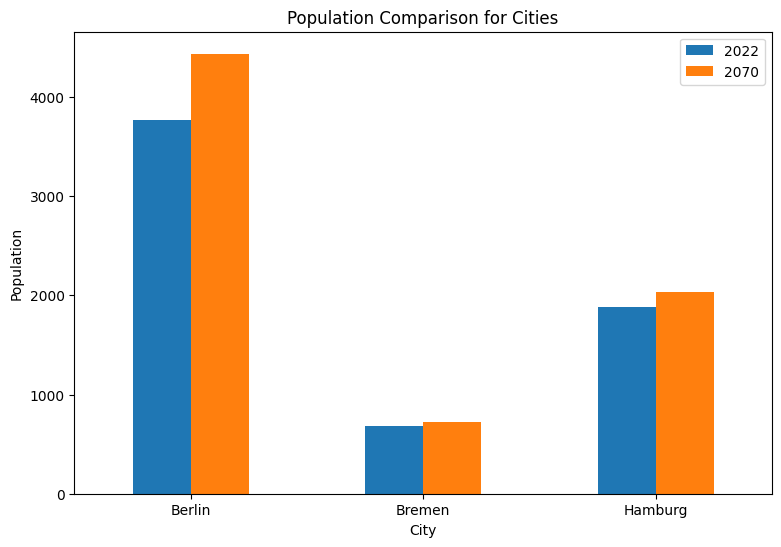

In [234]:
# Create the bar plot
city_df.drop(columns='Percentage Change').plot(kind='bar', figsize=(9, 6))
plt.title('Population Comparison for Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

#save the plot 
plt.savefig('../results/plots/city_state_comparison_2022-70.png')
# Display the plot
plt.show()


### Results
Both from the text output and the plot shows that Berlin will continue grow significant while surpisingly Hamburg and bremen are so far behind in percentage. In Question 6 I will cover this sub-topic a bit deeper. 

### 2. What state has the largest increase and decrease in population from 2022 to 2070? In absolute number as well in relation to current population.

In [236]:
all_states_df = create_df_based_on_states(default_df, time, states[3], sex[2])

# Calculate absolute change from 2022 to 2070
sum_pop = sum_df_by_state_all_ages(all_states_df, time)
    
abs_increase, abs_decrease = df_largest_change_absolute(sum_pop, time)
rel_increase, rel_decrease = df_largest_change_relative_percent(sum_pop, time)
    
    
print("With largest relative increase in percentage. \n") 
print(rel_increase)
print("\nWith largest relative decrease in percentage. \n") 
print(rel_decrease)
print("\nWith largest absolute increase. \n") 
print(abs_increase)
print("\nWith largest absolute decrease. \n") 
print(abs_decrease)
#print( all_states_df) #, abs_decrease, rel_increase, rel_decrease
abs_increase.to_csv('../results/text/biggest_changes/absolute_increase.txt', sep='\t')
rel_increase.to_csv('../results/text/biggest_changes/relative_increase.txt', sep='\t')
abs_decrease.to_csv('../results/text/biggest_changes/absolute_decrease.txt', sep='\t')
rel_decrease.to_csv('../results/text/biggest_changes/relative_decrease.txt', sep='\t')

With largest relative increase in percentage. 

2022                 3770.500000
2070                 4434.500000
Difference            664.000000
Percentage Change      17.610396
Name: Berlin, dtype: float64

With largest relative decrease in percentage. 

2022                 1488.100000
2070                 1133.200000
Difference           -354.900000
Percentage Change     -23.849204
Name: Thueringen, dtype: float64

With largest absolute increase. 

2022          3770.5
2070          4434.5
Difference     664.0
Name: Berlin, dtype: float64

With largest absolute decrease. 

2022          18080.5
2070          17265.8
Difference     -814.7
Name: Nordrhein-Westfalen, dtype: float64


### Results

The results are a bit surprising but also kind of not. Since Nordrein-Westfalen is the biggest state with the largest population one would suspect it also to be the number one when a decrease in numbers occurs. This is confirmed by NRW not being number 1 in relative terms as well. I am surprised though that in relative terms Thueringen has the larges decrease. 

But it is surprising that Berlin ranked first place in both relative and absolute increase. 


### 3. How is the general trend from 2022 and 2070 for former east German states and west German states?


In [237]:
group1_df = create_df_based_on_states(default_df, time, states[0], sex[2])
group2_df = create_df_based_on_states(default_df, time, states[1], sex[2])

# Calculate population for 2022 and 2070 for West and East states  
group1 = sum_df_by_state_all_ages(group1_df, time)
group2 = sum_df_by_state_all_ages(group2_df, time)    

# Calculate percentage change
group1_percentage_change = percent_change(group1, time)
group2_percentage_change = percent_change(group2, time)

group2.to_csv('../results/text/east_west_change/east_changes.txt', sep='\t')
print(group2)

                  2022    2070  Percentage Change
State                                            
Brandenburg     2563.4  2337.2          -8.824218
Sachsen         4065.0  3549.0         -12.693727
Sachsen-Anhalt  2172.1  1666.2         -23.290825
Thueringen      1488.1  1133.2         -23.849204


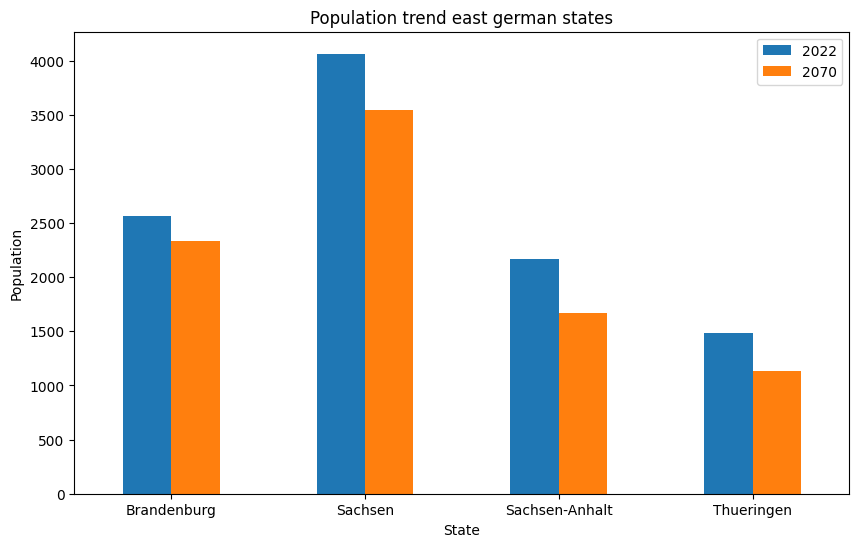

In [268]:
index = ['Brandenburg', 'Sachsen', 'Sachsen-Anhalt', 'Thueringen']
df = pd.DataFrame(group2, index=index)


# Plot the DataFrame
df.drop(columns='Percentage Change').plot(kind='bar', figsize=(10, 6))
plt.title('Population trend east german states')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=0)

plt.savefig('../results/plots/east_german_states_change_2022-70.png')
# Display the plot
plt.show()

It seems that in the next ~50 years both Sachsen and Sachsen-Anhalt will have the larges decline in population at least in relation to their current population in percentage. 
Is it because a lot of old people remain living there and they are about to pass away or is it more because of people especially the younger generations moving away. 
23% less is a lot. even though it is just 300.000 in absolute terms. But 300k less tax payers might be a problem in the future. The other states don't look that good either.

In [248]:
group1.to_csv('../results/text/east_west_change/east_changes.txt', sep='\t')
print(group1)

                        2022     2070  Percentage Change
State                                                   
Baden-Wuerttemberg   11278.6  11455.1           1.564911
Bayern               13381.3  13852.0           3.517595
Berlin                3770.5   4434.5          17.610396
Bremen                 687.4    724.5           5.397149
Hamburg               1879.6   2034.2           8.225154
Hessen                6379.6   6391.8           0.191235
Niedersachsen         8145.3   8140.8          -0.055247
Nordrhein-Westfalen  18080.5  17265.8          -4.505959
Rheinland-Pfalz       4160.2   4064.1          -2.309985
Saarland               989.2    853.3         -13.738374
Schleswig-Holstein    2955.3   2847.8          -3.637533


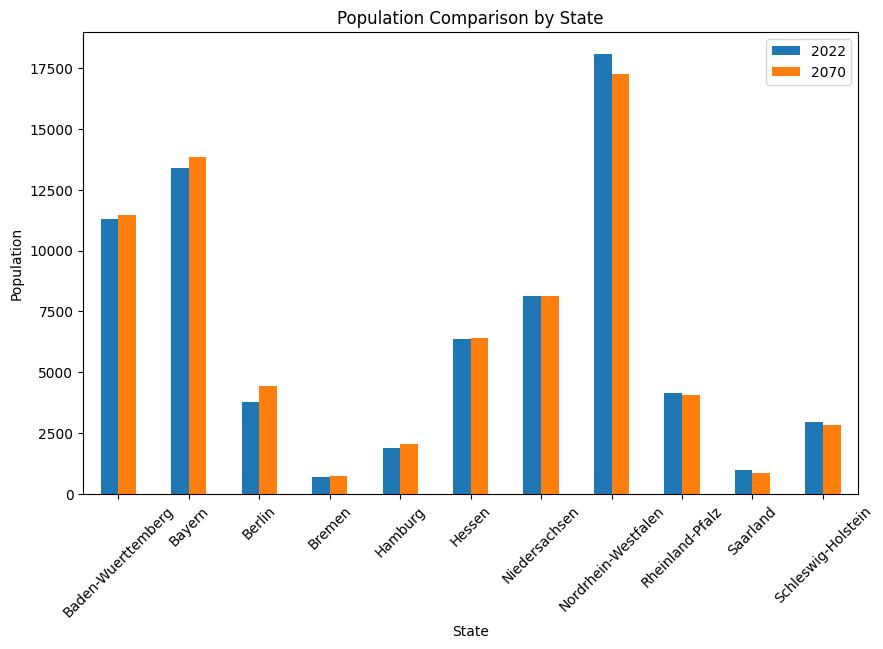

In [240]:
index = ['Baden-Wuerttemberg', 'Bayern', 'Berlin', 'Bremen', 'Hamburg', 'Hessen', 'Niedersachsen', 'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Schleswig-Holstein']
df = pd.DataFrame(group1, index=index)

# Plot the DataFrame
df.drop(columns='Percentage Change').plot(kind='bar', figsize=(10, 6))
plt.title('Population Comparison by State')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.savefig('../results/plots/west_german_states_change_2022-70.png')
# Display the plot
plt.show()

West german states seem fine, either a slight increase or a signifant increase except for Saarland which is decreasing by 13% and NRW with -4.5% directly behind it. Although I am bit confused why Saarland is losing people at that rate I am more surprised that western German looks fine over all. Especially considering the constant news about missing skilled labour.  

### 4. Is there a difference in population growth between genders from 2022 and 2070 across the whole country? 

In [260]:
male, female = compare_growth_accross_regions_gender(default_df, time, states[3], sex)

male.to_csv('../results/text/gender_change/male_changes.txt', sep='\t')
female.to_csv('../results/text/gender_change/female_changes.txt', sep='\t')


In [261]:

mf_combined = pd.concat([female, male], keys=['Female', 'Male'], axis=1)
print(mf_combined)

                        Female                              Male           
                          2022    2070 Percentage Change    2022    2070   
State                                                                      
Baden-Wuerttemberg      5690.7  5760.4          1.224805  5517.4  5620.9  \
Bayern                  6764.8  6972.1          3.064392  6616.1  6880.5   
Berlin                  1925.6  2272.5         18.015164  1845.1  2162.7   
Brandenburg             1303.5  1194.7         -8.346759  1260.1  1142.9   
Bremen                   348.7   364.2          4.445082   338.8   360.0   
Hamburg                  961.7  1041.5          8.297806   917.7   992.8   
Hessen                  3236.8  3228.1         -0.268784  3142.0  3163.7   
Mecklenburg-Vorpommern   825.7   696.5        -15.647330   797.0   657.6   
Niedersachsen           4136.4  4119.4         -0.410985  4009.1  4020.8   
Nordrhein-Westfalen     9224.9  8730.6         -5.358324  8856.0  8535.4   
Rheinland-Pf

In [262]:
ymale, yfemale = compare_growth_accross_regions_gender(young_df, time, states[3], sex)

ymale.to_csv('../results/text/gender_change/young_male_changes.txt', sep='\t')
yfemale.to_csv('../results/text/gender_change/young_female_changes.txt', sep='\t')

young_mf_combined = pd.concat([yfemale, ymale], keys=[' Young Female', 'Young Male'], axis=1)
print(young_mf_combined)

                        Young Female                           Young Male   
                                2022    2070 Percentage Change       2022   
State                                                                       
Baden-Wuerttemberg            6263.6  6022.8         -3.844435     6532.6  \
Bayern                        7413.4  7316.0         -1.313837     7752.4   
Berlin                        2313.6  2415.6          4.408714     2358.0   
Brandenburg                   1240.0  1151.4         -7.145161     1307.2   
Bremen                         393.4   398.2          1.220132      415.6   
Hamburg                       1161.2  1098.2         -5.425422     1171.6   
Hessen                        3539.2  3385.6         -4.339964     3664.4   
Mecklenburg-Vorpommern         776.0   675.2        -12.989691      827.8   
Niedersachsen                 4344.0  4347.6          0.082873     4526.4   
Nordrhein-Westfalen           9887.2  9132.6         -7.632090    10230.0   

Here are two interestign dynamics observable, 
1. There is no state with more females than males when looking only at the < 49 year olds.
2. With the > 49 year olds added every state has more women then men. This is not surprising since women live longer. 
2. The rate of decrease is significantly higher with males than females when looking at the < 49 year olds

That means especially in East Germany that More young people either move away or die in the next 50 years. 

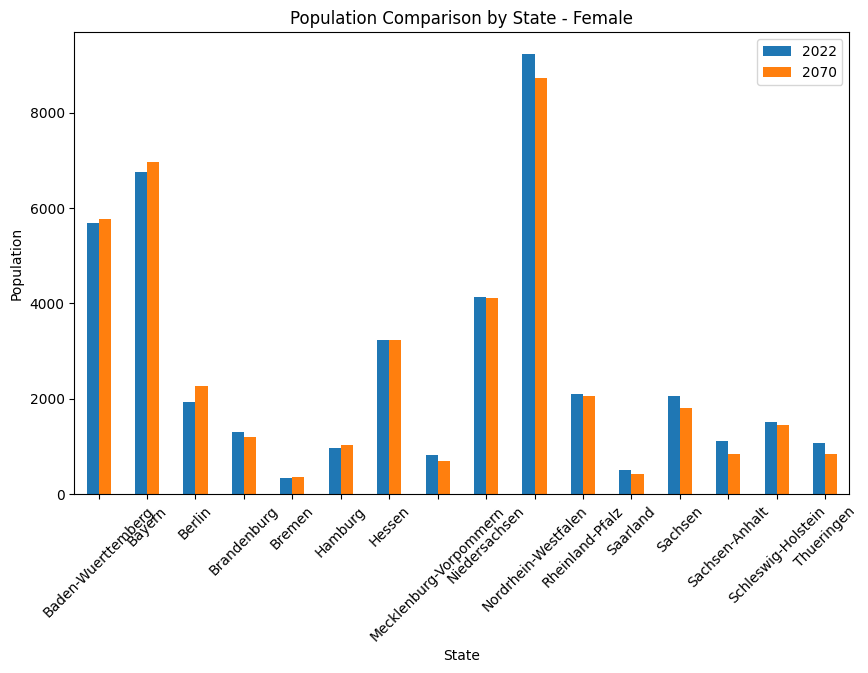

In [263]:
# Plot the DataFrame
female.drop(columns='Percentage Change').plot(kind='bar', figsize=(10, 6))
plt.title('Population Comparison by State - Female')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.savefig('../results/plots/female_population_change_2022-70.png')
# Display the plot
plt.show()

The above and below plot both give an interesting overview how population is distributed today and how it will be. The "winners" and "losers" are also immediately visible

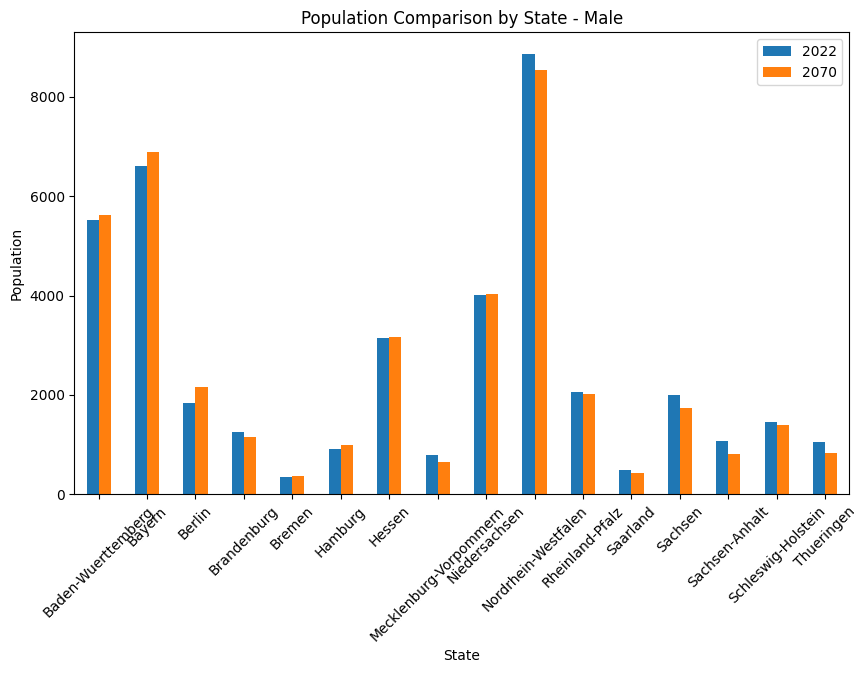

In [266]:
# Plot the DataFrame
male.drop(columns='Percentage Change').plot(kind='bar', figsize=(10, 6))
plt.title('Population Comparison by State - Male')
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.savefig('../results/plots/young_male_population_change_2022-70.png')
# Display the plot
plt.show()

### 5. Does the same apply in east vs west?

Yes while the East is losing 20% of it's population, it is fairly evenly distributed. 

In [267]:
print(mf_combined)

                        Female                              Male           
                          2022    2070 Percentage Change    2022    2070   
State                                                                      
Baden-Wuerttemberg      5690.7  5760.4          1.224805  5517.4  5620.9  \
Bayern                  6764.8  6972.1          3.064392  6616.1  6880.5   
Berlin                  1925.6  2272.5         18.015164  1845.1  2162.7   
Brandenburg             1303.5  1194.7         -8.346759  1260.1  1142.9   
Bremen                   348.7   364.2          4.445082   338.8   360.0   
Hamburg                  961.7  1041.5          8.297806   917.7   992.8   
Hessen                  3236.8  3228.1         -0.268784  3142.0  3163.7   
Mecklenburg-Vorpommern   825.7   696.5        -15.647330   797.0   657.6   
Niedersachsen           4136.4  4119.4         -0.410985  4009.1  4020.8   
Nordrhein-Westfalen     9224.9  8730.6         -5.358324  8856.0  8535.4   
Rheinland-Pf

Since there are more Women, thanks to them living longer the rate of decrease is a bit slower for them across the country. There is no significant difference between East and West visible

### 6. How much does the population decrease and increase in Berlin, Hamburg and Bremen for both male and female, from 2022 to 2040 and finally from 2040 to 2070? 


Initilly I though I should keep it at the above age ranges but the results where a bit surprising. Mainly because I importet the young_df first at the top and only noticed later that there is something wrong. 
But even with new and correct data it is weird that Bremen is the only City gaining more female than male population. While Hamburg and Berlin both have a higher intake of males. Another interesting fact that the data shows is that until 2030 berlin will grow by 17% and after that the growth will decrease until about ~3%. Same can be observed with the other two cities. 

This data, at least, gives me some hope that if I were to invest in property i.e. buying a house it might not lose its worth the next decades. Which is good for my pension fund and if I were to have kids, for them as well.

In [245]:
time2 = [2022, 2030]
time3 = [2030, 2040]
time4 = [2040, 2050]         
time5 = [2050, 2060]
time6 = [2060, 2070]

male_22_30, female_22_30 = compare_growth_accross_regions_gender(default_df, time, states[2], sex)
male_30_40, female_30_40 = compare_growth_accross_regions_gender(default_df, time3, states[2], sex)
male_40_50, female_40_50 = compare_growth_accross_regions_gender(default_df, time4, states[2], sex)
male_50_60, female_50_60 = compare_growth_accross_regions_gender(default_df, time5, states[2], sex)
male_60_70, female_60_70 = compare_growth_accross_regions_gender(default_df, time6, states[2], sex)

mf_2022_2030 = pd.concat([male_22_30, female_22_30], keys=['Female', 'Male'], axis=1)
mf_2030_2040 = pd.concat([male_30_40, female_30_40], keys=['Female', 'Male'], axis=1)
mf_2040_2050 = pd.concat([male_40_50, female_40_50], keys=['Female', 'Male'], axis=1)
mf_2050_2060 = pd.concat([male_50_60, female_50_60], keys=['Female', 'Male'], axis=1)
mf_2060_2070 = pd.concat([male_60_70, female_60_70], keys=['Female', 'Male'], axis=1)

mf_2022_2030.to_csv('../results/text/city_changes_by_gender/male_female_22-30changes.txt', sep='\t')
mf_2030_2040.to_csv('../results/text/city_changes_by_gender/male_female_changes_30-30.txt', sep='\t')
mf_2040_2050.to_csv('../results/text/city_changes_by_gender/male_female_changes_40-50.txt', sep='\t')
mf_2050_2060.to_csv('../results/text/city_changes_by_gender/male_female_changes_50-60.txt', sep='\t')
mf_2060_2070.to_csv('../results/text/city_changes_by_gender/male_female_changes_60-70.txt', sep='\t')

In [246]:
print(mf_2022_2030)
print(mf_2030_2040)
print(mf_2040_2050)

         Female                              Male                          
           2022    2070 Percentage Change    2022    2070 Percentage Change
State                                                                      
Berlin   1845.1  2162.7         17.213159  1925.6  2272.5         18.015164
Bremen    338.8   360.0          6.257379   348.7   364.2          4.445082
Hamburg   917.7   992.8          8.183502   961.7  1041.5          8.297806
         Female                              Male                          
           2030    2040 Percentage Change    2030    2040 Percentage Change
State                                                                      
Berlin   1924.6  1990.2          3.408500  2015.3  2085.5          3.483352
Bremen    342.1   344.7          0.760012   351.3   353.0          0.483917
Hamburg   942.0   960.5          1.963907   988.4  1010.8          2.266289
         Female                              Male                          
           2

In [269]:
print(mf_2050_2060)
print(mf_2060_2070)

         Female                              Male                          
           2050    2060 Percentage Change    2050    2060 Percentage Change
State                                                                      
Berlin   2057.4  2114.6          2.780208  2158.9  2219.6          2.811617
Bremen    348.7   354.5          1.663321   356.2   359.9          1.038742
Hamburg   978.1   987.8          0.991719  1029.8  1037.4          0.738007
         Female                              Male                          
           2060    2070 Percentage Change    2060    2070 Percentage Change
State                                                                      
Berlin   2114.6  2162.7          2.274662  2219.6  2272.5          2.383312
Bremen    354.5   360.0          1.551481   359.9   364.2          1.194776
Hamburg   987.8   992.8          0.506175  1037.4  1041.5          0.395219


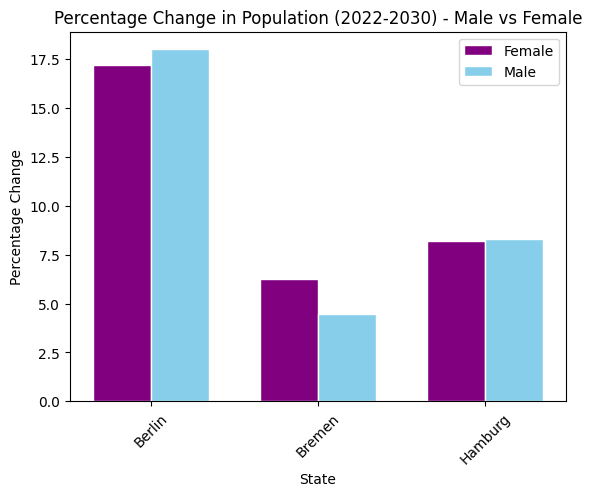

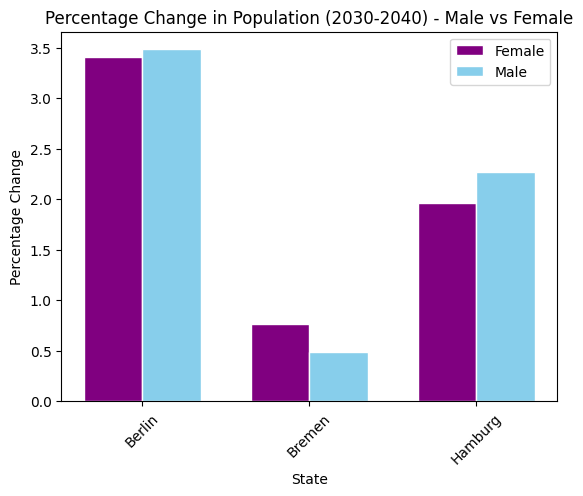

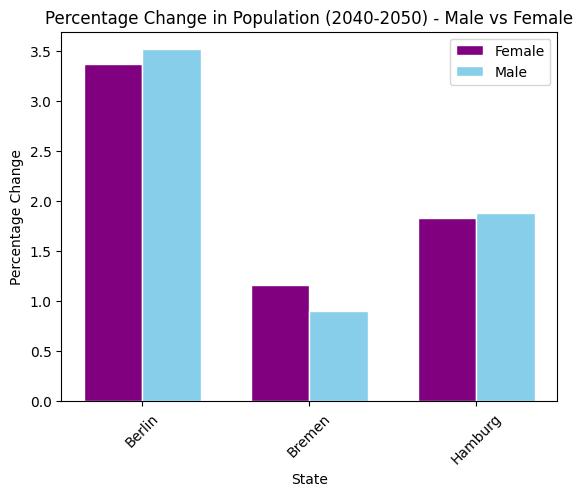

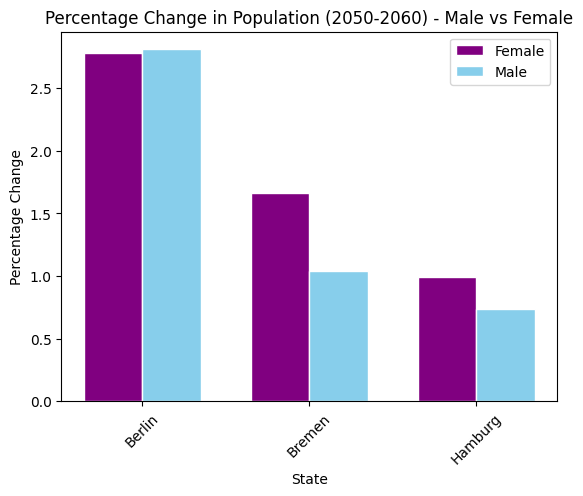

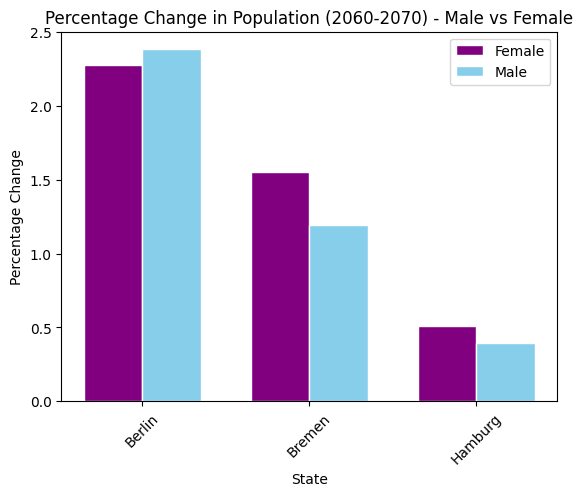

In [247]:
# Define a function to create the bar plot
def create_population_bar(data_frame, title):
    # Extract the male and female data
    female_data = data_frame['Female']['Percentage Change']
    male_data = data_frame['Male']['Percentage Change']
    # Get the state names as x-axis labels
    states = data_frame.index
    # Set the width of the bars
    bar_width = 0.35
    # Set the position of the bars on the x-axis
    r1 = range(len(states))
    r2 = [x + bar_width for x in r1]

    # Create the bar plot
    plt.bar(r1, female_data, color='purple', width=bar_width, edgecolor='white', label='Female')
    plt.bar(r2, male_data, color='skyblue', width=bar_width, edgecolor='white', label='Male')

    # Set the labels and title
    plt.xlabel('State')
    plt.ylabel('Percentage Change')
    plt.title(title)
    plt.xticks([r + bar_width/2 for r in range(len(states))], states, rotation=45)
    plt.legend()
  
    # Display the plot
    plt.show()
    
# Create bar plots for each DataFrame
create_population_bar(mf_2022_2030, 'Percentage Change in Population (2022-2030) - Male vs Female')
create_population_bar(mf_2030_2040, 'Percentage Change in Population (2030-2040) - Male vs Female')
create_population_bar(mf_2040_2050, 'Percentage Change in Population (2040-2050) - Male vs Female')
create_population_bar(mf_2050_2060, 'Percentage Change in Population (2050-2060) - Male vs Female')
create_population_bar(mf_2060_2070, 'Percentage Change in Population (2060-2070) - Male vs Female')


# Conclusion

There are a lot of different aspects, that one would not think about beforehand. One fact that shocked me was, in how much trouble east Germany is in. 
Even more dramatic was that there is even a large movement in people below 49 years. Or there are not enough young people and at least for the data used a turning point
happens where a whole generation enters the 50+ bracket and thereby reducing the younger group to nothing. 

As I have mentioned earlier, I do not have a reason to panic yet. Berlin seems perfectly fine. And looking at the stats the medium long term future of Berlin should be save.
Of course unless something happens. Mars Attacks or some one from the East gets trigger happy. 